In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## EDA

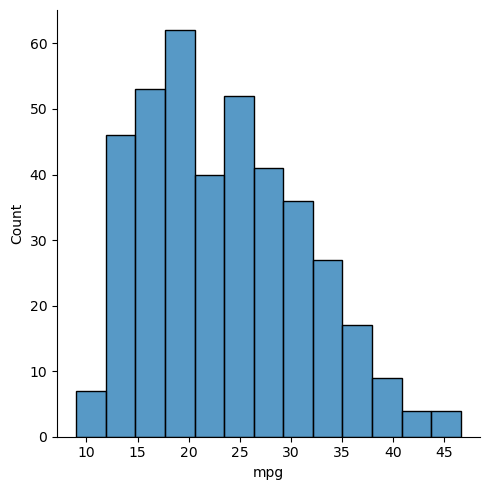

In [4]:
sns.displot(x=data.mpg,data=data)

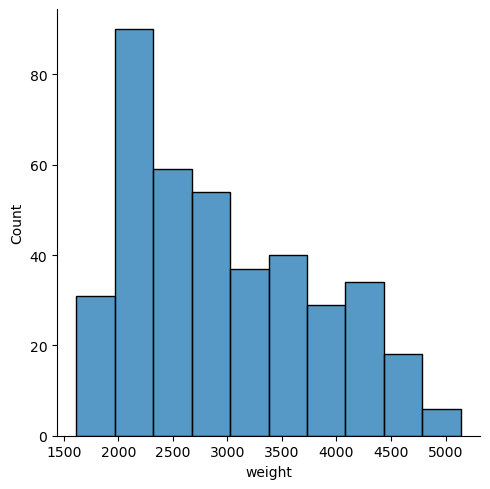

In [5]:
sns.displot(x=data.weight,data=data)

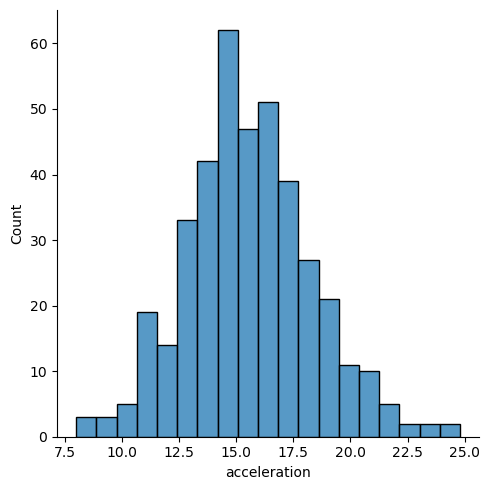

In [6]:
sns.displot(x=data.acceleration,data=data)

<Axes: xlabel='weight', ylabel='acceleration'>

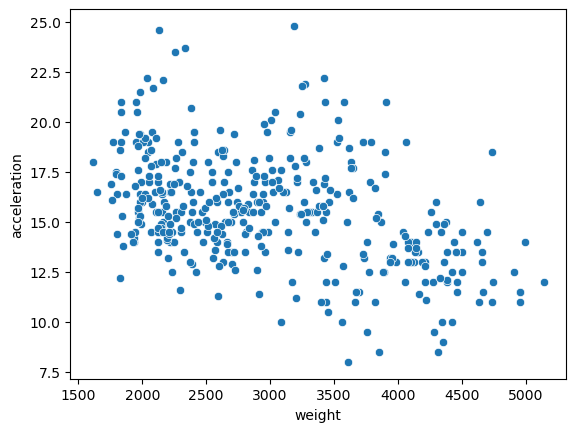

In [7]:
sns.scatterplot(x=data.weight,y=data.acceleration,data=data)

C:\Users\parit\AppData\Local\Temp\ipykernel_10896\3284826886.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1,annot=True)


<Axes: >

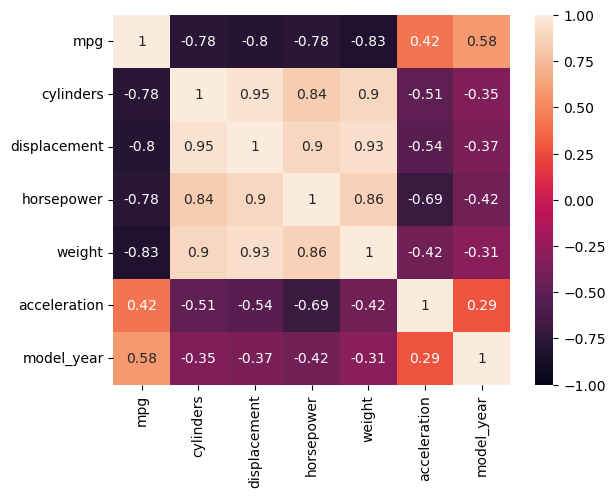

In [8]:
sns.heatmap(data.corr(),vmin=-1,annot=True)

In [9]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
data["horsepower"].fillna(0,inplace=True)

In [11]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
y=data["mpg"]
x=data[["weight","acceleration"]]

## How to choose value of K

In [36]:
error=[]
k=[]
for i in range(1,21):
    knn=KNeighborsRegressor(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    err=1-round(model.score(x_train,y_train),2)
    error.append(err)
    k.append(i)

In [37]:
pd.DataFrame({"error":error,"k":k})

,error,k
0,0.00,1
1,0.16,2
2,0.22,3
3,0.23,4
4,0.24,5
5,0.25,6
6,0.25,7
7,0.25,8
8,0.26,9
9,0.27,10


In [38]:
## idiol k value is 2 because its having low error

## KNN Regression 

In [13]:
### mpg has continous data that's why we use KNN Regression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
knn=KNeighborsRegressor(n_neighbors=2)

In [18]:
model=knn.fit(x_train,y_train)

In [19]:
print("training score=",model.score(x_train,y_train))

training score= 0.8409386279014717


In [20]:
pred=model.predict(x_test)
pred

array([36.1 , 28.7 , 29.1 , 16.  , 16.  , 35.3 , 22.7 , 11.  , 14.25,
       22.7 , 15.6 , 29.  , 28.5 , 16.75, 27.65, 12.  , 22.5 , 19.  ,
       16.  , 37.55, 28.05, 21.15, 21.15, 34.7 , 21.95, 30.5 , 29.1 ,
       25.1 , 19.3 , 12.  , 19.8 , 32.05, 16.5 , 24.  , 34.4 , 13.  ,
       26.  , 20.5 , 12.5 , 24.  , 23.5 , 33.45, 21.6 , 12.5 , 28.05,
       26.  , 30.  , 27.9 , 23.  , 23.  , 21.95, 37.55, 30.  , 14.5 ,
       23.3 , 13.5 , 16.  , 24.55, 29.1 , 19.6 , 15.5 , 36.1 , 26.8 ,
       18.9 , 21.3 , 25.95, 22.7 , 28.25, 26.  , 13.5 , 28.35, 13.  ,
       15.  , 21.6 , 20.  , 21.3 , 21.95, 27.2 , 29.  , 15.6 ])

In [21]:
from sklearn.metrics import r2_score

In [22]:
print("testing score=",r2_score(y_test,pred))

testing score= 0.6863529308649877


In [26]:
x_test.head()

,weight,acceleration
198,1795,17.4
396,2625,18.6
33,2634,13.0
208,3940,13.2
93,4237,14.5


In [27]:
x_test["actual_mpg"]=y_test
x_test["predicted_mpg"]=pred
x_test

,weight,acceleration,actual_mpg,predicted_mpg
198,1795,17.4,33.0,36.10
396,2625,18.6,28.0,28.70
33,2634,13.0,19.0,29.10
208,3940,13.2,13.0,16.00
93,4237,14.5,14.0,16.00
...,...,...,...,...
249,3365,15.5,19.9,21.30
225,3520,16.4,17.5,21.95
367,2605,19.6,28.0,27.20
175,1937,14.0,29.0,29.00


## Eg:- Predict mpg from new raw_data

In [31]:
raw_data=pd.DataFrame(dict(weight=[2000,1998,1700,1795],acceleration=[20,15,18,17.4]))

In [32]:
raw_data

,weight,acceleration
0,2000,20.0
1,1998,15.0
2,1700,18.0
3,1795,17.4


In [33]:
pred=model.predict(raw_data)

In [34]:
raw_data["predicted_mpg"]=pred

In [35]:
raw_data

,weight,acceleration,predicted_mpg
0,2000,20.0,32.445
1,1998,15.0,32.445
2,1700,18.0,33.790
3,1795,17.4,33.715
